In [1]:
# Import Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read and discovering of the 10 first rows of the reviews DataFrame

reviews_df = pd.read_csv('./Datasets/Womens Clothing E-Commerce Reviews.csv')
reviews_df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [3]:
reviews_df.shape

(23486, 11)

In [4]:
# Check the dataframe info and Features(columns)type

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
# Dropout Unwanted Column (ie. 'Unnamed')

reviews_df.drop(['Unnamed: 0'], axis=1, inplace=True)
reviews_df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [6]:
# Rename the columns names and make them more pythonic

reviews_df.rename(columns={'Clothing ID' : 'Clothing_id', 'Review Text': 'Reviews_text',
                    'Positive Feedback Count': 'Positive_feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended_ind'},inplace=True)

In [7]:
# New Columns Names

print(reviews_df.columns)

Index(['Clothing_id', 'Age', 'Title', 'Reviews_text', 'Rating',
       'Recommended_ind', 'Positive_feedback_count', 'Division', 'Department',
       'Class'],
      dtype='object')


In [8]:
# Look into the missing values at each column index

reviews_df.isnull().sum()

Clothing_id                   0
Age                           0
Title                      3810
Reviews_text                845
Rating                        0
Recommended_ind               0
Positive_feedback_count       0
Division                     14
Department                   14
Class                        14
dtype: int64

In [9]:
percent_missing = reviews_df.isnull().sum() * 100 / len(reviews_df)
percent_missing

Clothing_id                 0.000000
Age                         0.000000
Title                      16.222430
Reviews_text                3.597888
Rating                      0.000000
Recommended_ind             0.000000
Positive_feedback_count     0.000000
Division                    0.059610
Department                  0.059610
Class                       0.059610
dtype: float64

We will exclude Review text, Divison, Department and Class with missing values except for Title, to preserve the high percentage - 16% of value reviews data

In [10]:
# Removing out every row in the dataframe which contains missing data

reviews_df.dropna(subset=['Reviews_text','Division', 'Department', 'Class'], inplace=True)

In [11]:
reviews_df.isnull().sum()

Clothing_id                   0
Age                           0
Title                      2966
Reviews_text                  0
Rating                        0
Recommended_ind               0
Positive_feedback_count       0
Division                      0
Department                    0
Class                         0
dtype: int64

In [12]:
reviews_df.describe()

,Clothing_id,Age,Rating,Recommended_ind,Positive_feedback_count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784
std,201.683804,12.328176,1.115911,0.385222,5.787520
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


Given the age group of reviewers spans over wide range of age (18-99), we'll categorise them into separate bins (10-20], (20-30] etc. This enables subsequent analysis to be more meaningful, because based on the ratings and sentiments of each age group, the company can tailor its marketing strategies accordingly or provide a more unique shopping experience for each age group, assuming that women in the same age group tend to share some similarities in online shopping habits.

In [13]:
bins = np.arange(0,100,10)
reviews_df['Age_group'] = pd.cut(reviews_df['Age'], bins)
reviews_df.head()

,Clothing_id,Age,Title,Reviews_text,Rating,Recommended_ind,Positive_feedback_count,Division,Department,Class,Age_group
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"(30, 40]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"(30, 40]"
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40, 50]"


### Data Exploratory Analysis

In [71]:
import plotly
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# Create a hsitogram to check the reviewers age distribution

reviews_df['Age'].iplot(kind='hist', bins=40, xTitle='Age', yTitle='Count', title='Reviewers Age Distribution')

Histgram of the reviews dataframe above show that customer age 35-39 are the main customers of the site.

In [72]:
# Create a histogram for Rating Distribution 


reviews_df['Rating'].iplot(kind='hist',xTitle='Rating', yTitle='Count', title='Ratings Distribution')

Histgram above show that most customer given rating 5 for the site.

<AxesSubplot:xlabel='Rating'>

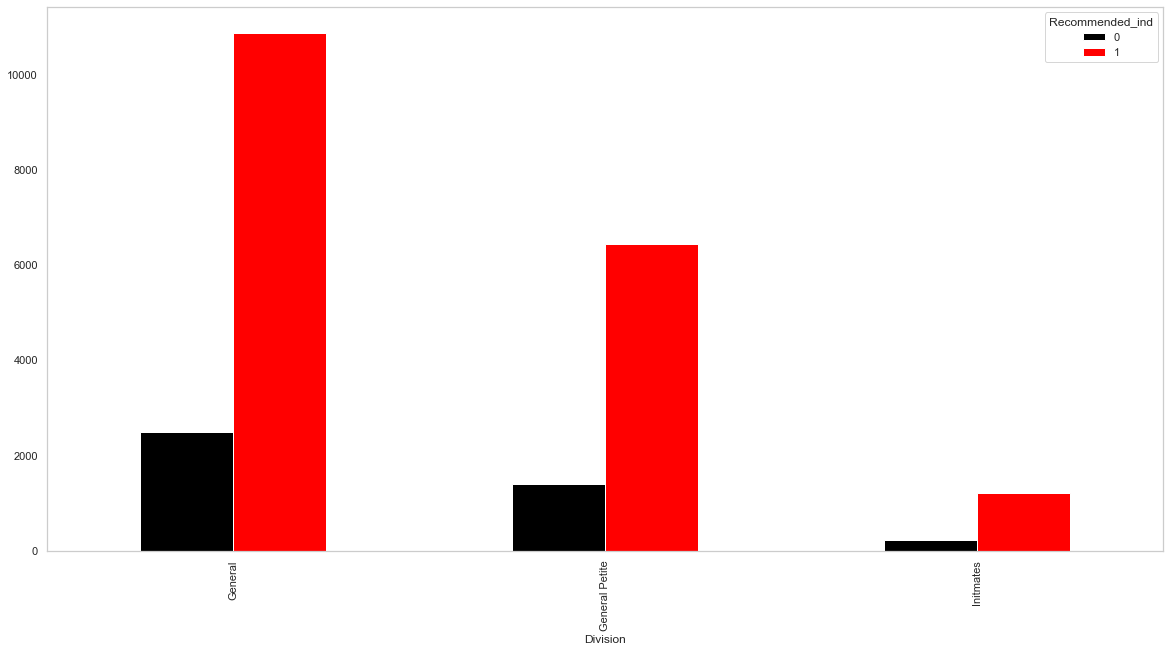

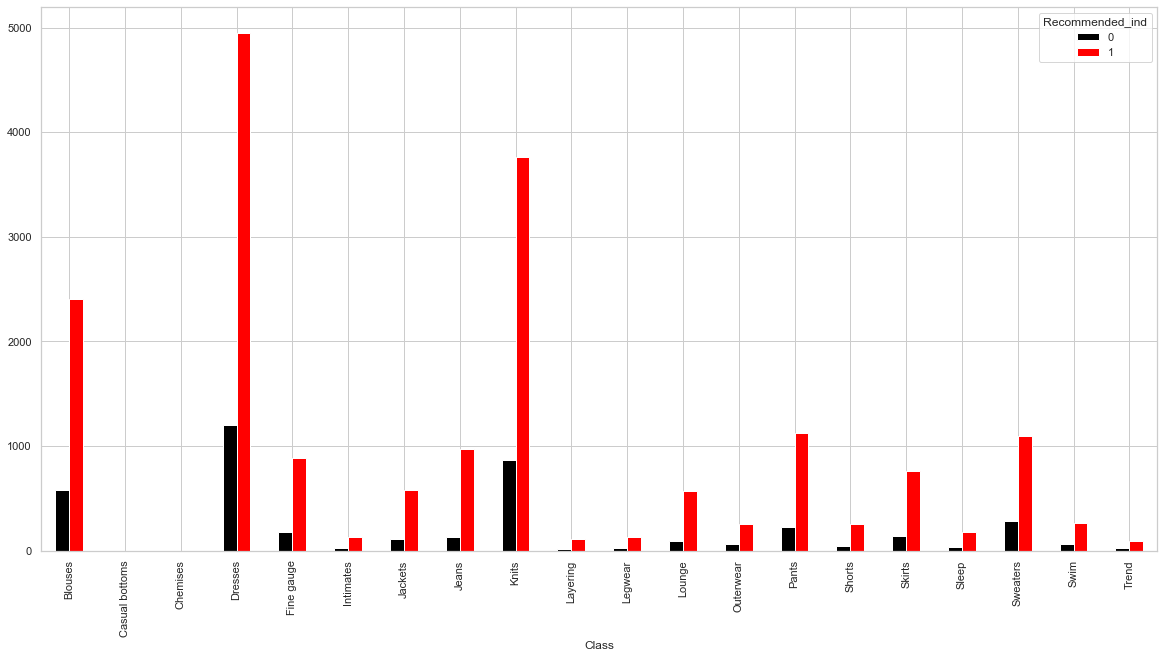

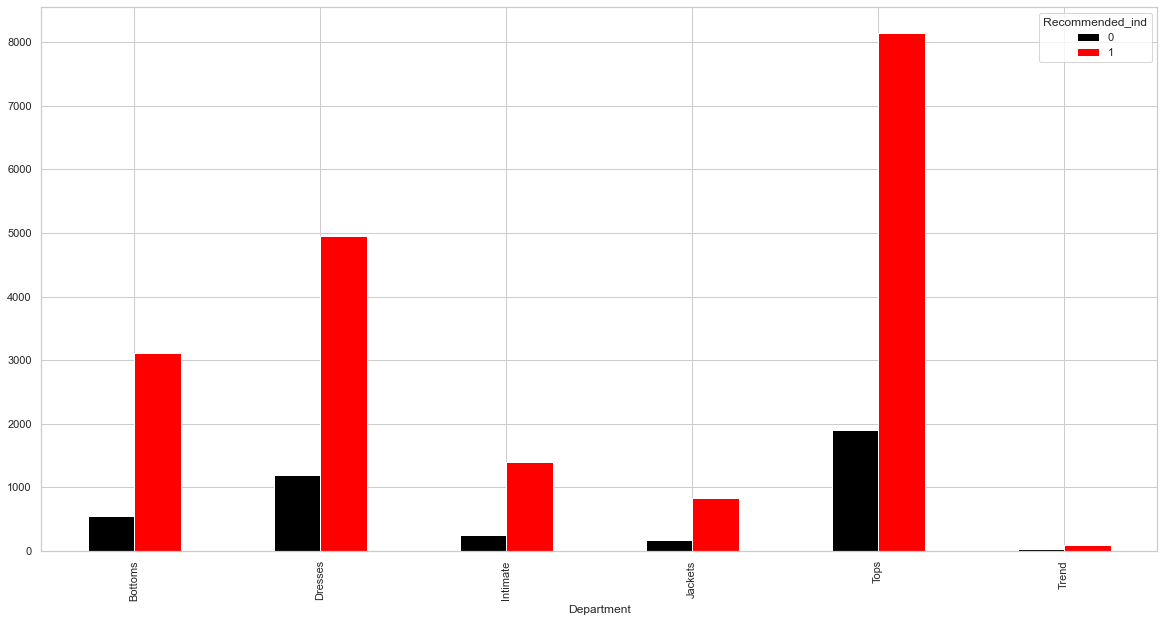

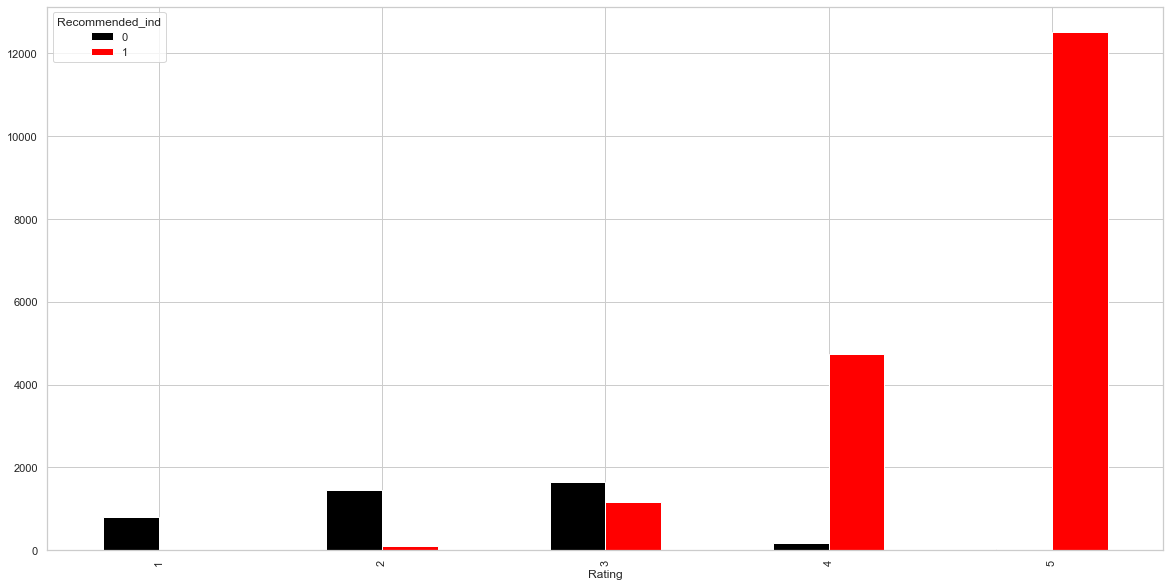

In [112]:
#  Create the bar charts of “Division_Name”, “Class_Name”, “Department_Name”, and “Rating'' by “Recommended_IND”.

DIMS=(20, 10)

reviews_df.groupby(['Division','Recommended_ind'])['Clothing_id'].count().unstack('Recommended_ind').plot.bar(figsize=DIMS,color=['black', 'red'],grid= False)

reviews_df.groupby(['Class','Recommended_ind'])['Clothing_id'].count().unstack('Recommended_ind').plot.bar(figsize=DIMS,color=['black', 'red'])

reviews_df.groupby(['Department','Recommended_ind'])['Clothing_id'].count().unstack('Recommended_ind').plot.bar(figsize=DIMS,color=['black', 'red'])

reviews_df.groupby(['Rating','Recommended_ind'])['Clothing_id'].count().unstack('Recommended_ind').plot.bar(figsize=DIMS,color=['black', 'red'])

Above bar chart show prove the truth that customer giving the higher rating score will tend to give positive recomendatation as well.

<bound method FigureBase.suptitle of <Figure size 1440x720 with 1 Axes>>

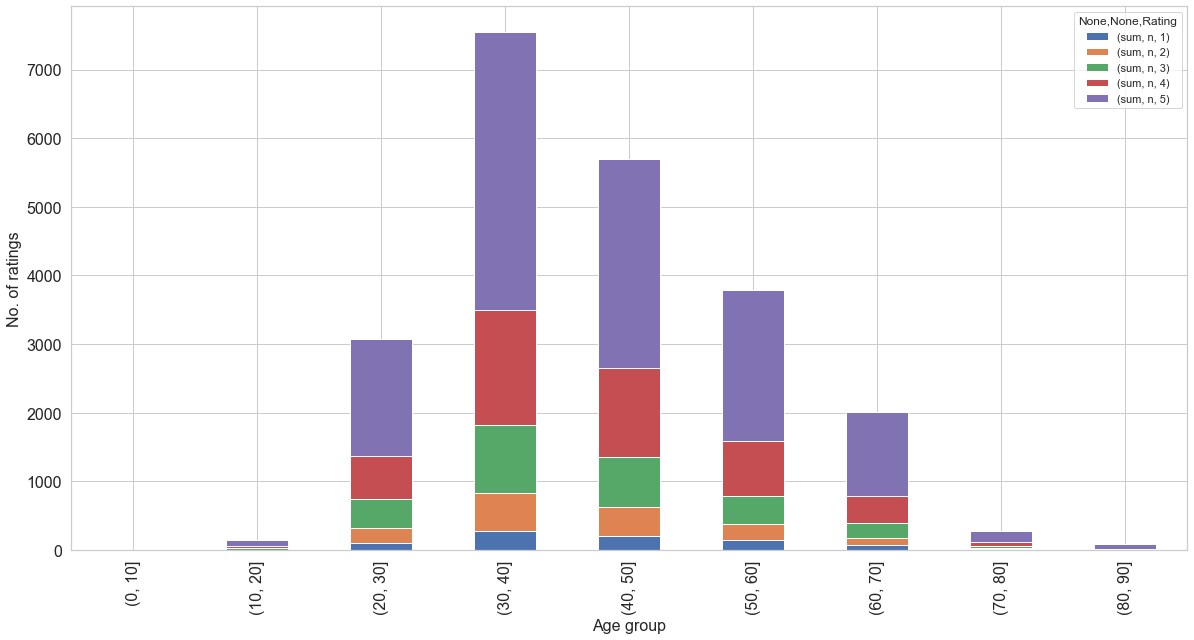

In [17]:
# Create a staked column chart to check the proportional contribution of individual rating by age group

fig = plt.figure(figsize=DIMS)
ax = fig.add_subplot(111)


ratings_count_df = reviews_df.groupby(['Rating', 'Age_group']).size().reset_index(name='n')
#ratings_count_df.columns

ratings_count_df_pivot = pd.pivot_table(ratings_count_df,index=['Age_group'],
               values=['n'],
               columns=['Rating'],
               aggfunc=[np.sum])

ratings_count_df_pivot
ratings_count_df_pivot.plot(kind = 'bar', stacked=True, fontsize = 16, ax=ax)
ax.set_ylabel('No. of ratings', fontsize=16)
ax.set_xlabel('Age group', fontsize=16)
fig.suptitle

Conclusion: Women in the 30s to 40s give the most number of online reviews, followed by women in the 40s to 50s, 50s to 60s then young women in their 20s to 30s . This is surprising, given that e-commerce sites tend to be more popular among young women. Perhaps youngsters shop online but do not provide their ratings, thus these people are not captured in dataset.
The most common rating given is 5 across women from ages 20 to 70. While this could mean the e-commerce company may be doing a good job at providing a good shopping experience for their customers, analysing the sentiments of the customers' reviews will tell us a more holistic story.

<AxesSubplot:xlabel='Rating', ylabel='Class'>

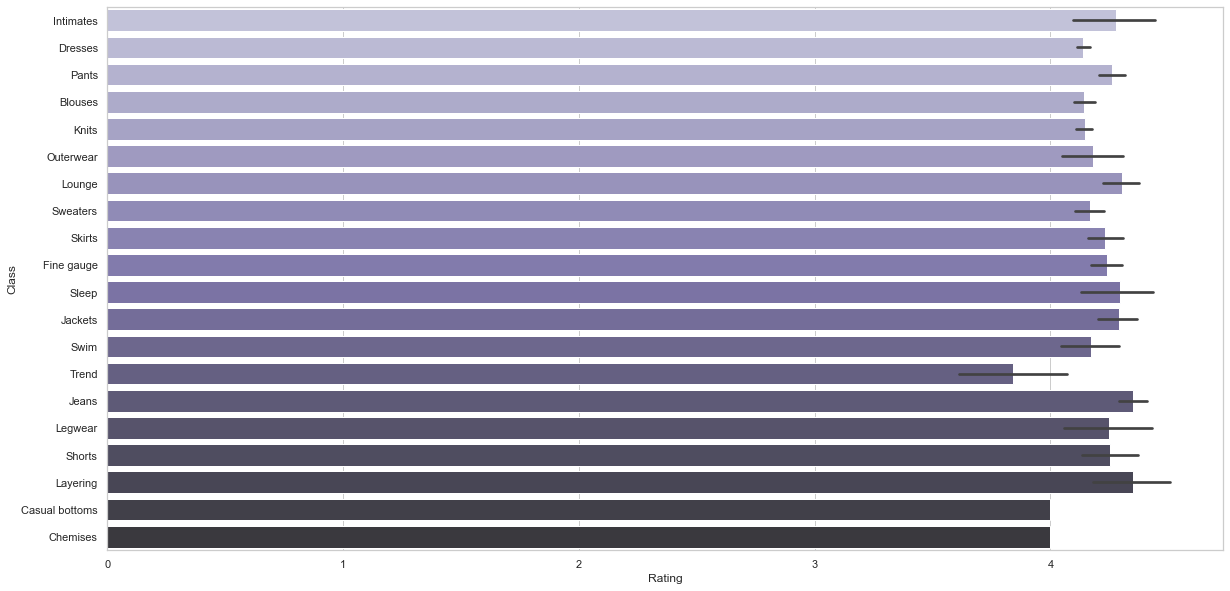

In [107]:
# Create a bar chart to check the average Rating by Class

fig = plt.figure(figsize=DIMS)
sns.set_style=('Whitegird')
sns.barplot(x=reviews_df['Rating'], y=reviews_df['Class'],palette="Purples_d")

Layering class on the top of whole average ratings comparing to other classes

<AxesSubplot:xlabel='Age', ylabel='Class'>

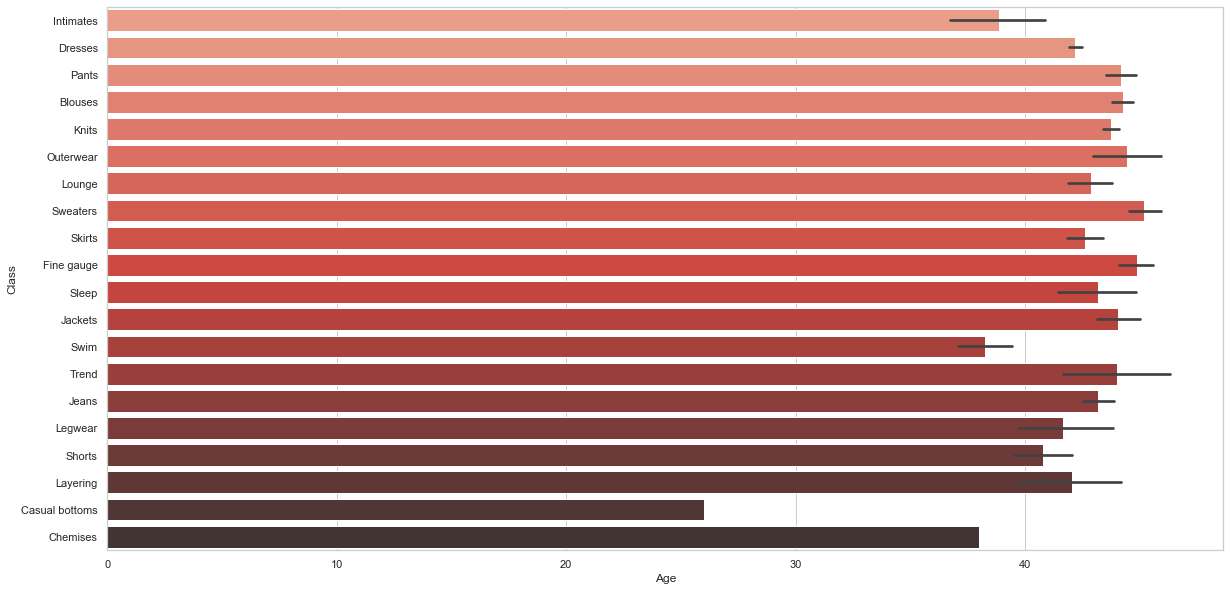

In [19]:
# Create a bar chart to check the average age by Class

fig = plt.figure(figsize=DIMS)
sns.set_style=('whitegird')
sns.color_palette('flare', as_cmap=False)
sns.barplot(x=reviews_df['Age'], y=reviews_df['Class'],palette='Reds_d')

Sweaters are the most preferable item for those average age above 40's while Casual bottoms attracts average age of 20's as this barplot shows above.

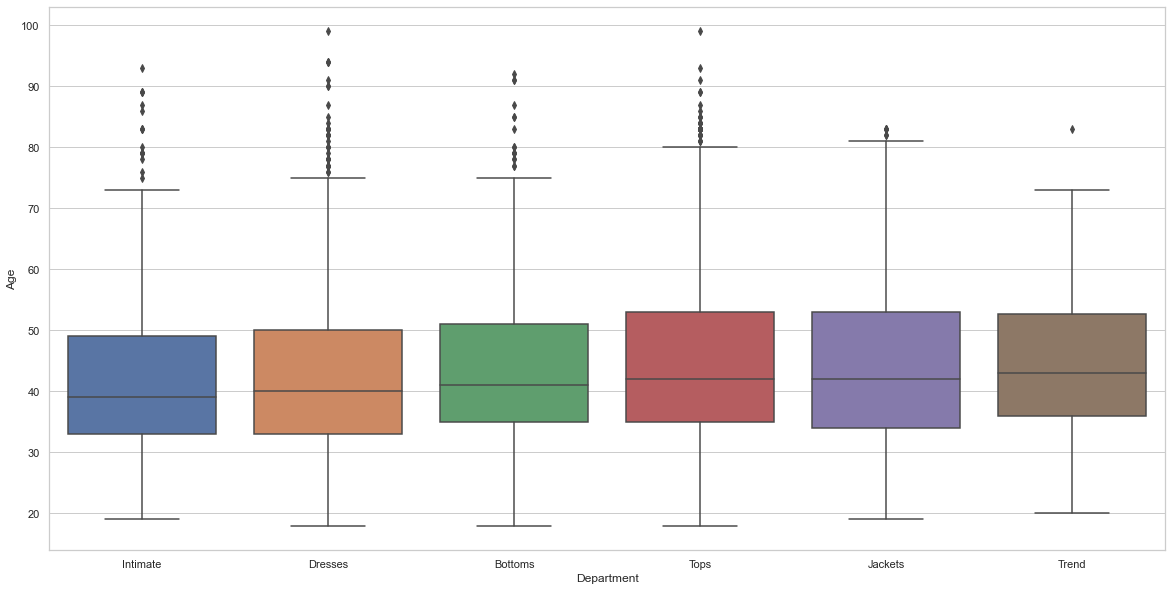

In [20]:
# Create a boxplot to analyse the customer age spread distribution by department

fig = plt.figure(figsize=DIMS)
sns.set_theme(style="whitegrid")
sns.boxplot(x=reviews_df['Department'], y=reviews_df['Age'])
plt.show()

This boxplot above determine the mean age according to each department. There are centralise mean age on range around 38-43 and skewed to the right with handfull amount of outlier (golden age customer above 75) except for the Trend department which seem close to symmetric with only 1 outlier.

<AxesSubplot:ylabel='Rating'>

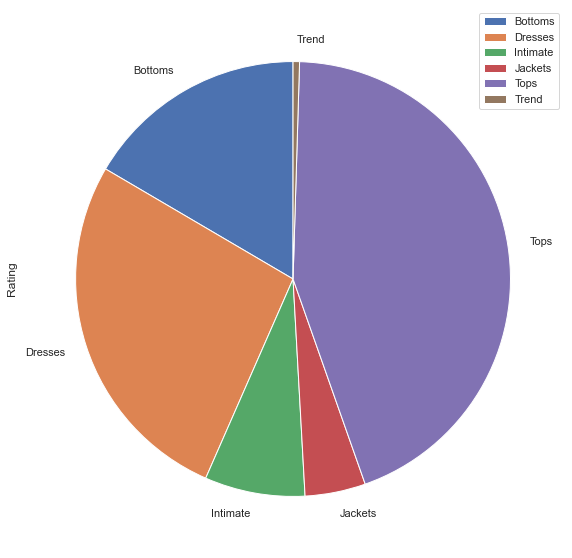

In [21]:
# Create a pie chart to analyse the Rating score count by department


reviews_df.groupby(['Department']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=DIMS, y='Rating')


Piechart visualize the ranking of departments has gotten the most amounts of ratings are Tops follow by Dress, Bottom, Intimate and Jacket while Trends got the low amount of ratings.

<AxesSubplot:xlabel='count', ylabel='Class'>

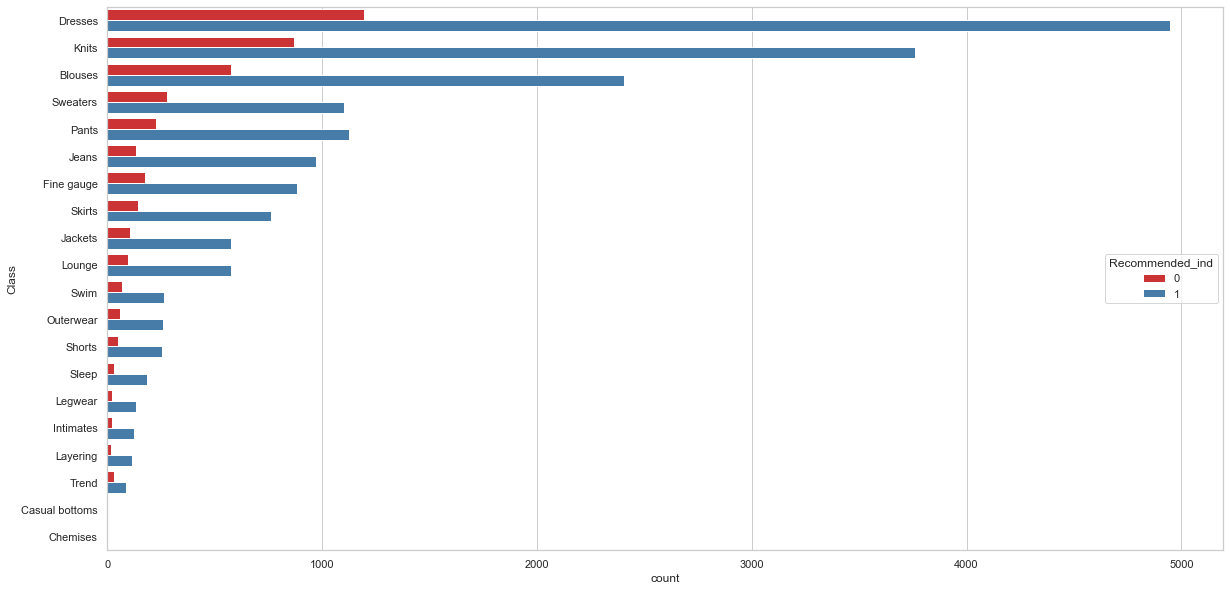

In [96]:
# Create a bar chart to find out which class is highly Recommended

fig = plt.figure(figsize=DIMS)
sns.countplot(data=reviews_df, y='Class', hue='Recommended_ind',  palette = "Set1",order = reviews_df['Class'].value_counts().index)

Dress class had the most recommended with about 5/6 (83.3%) out of the its total customer recomendation comment. 

<AxesSubplot:xlabel='count', ylabel='Department'>

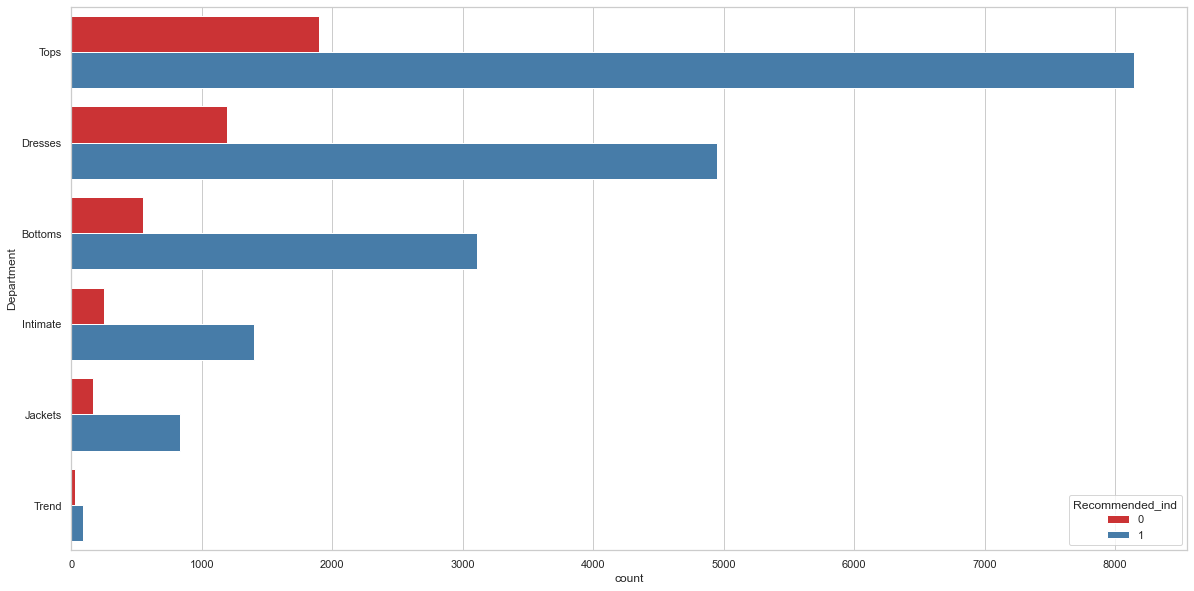

In [92]:
# Create a bar chart to find out which department had the highest positive Recommended index.

fig = plt.figure(figsize=DIMS)
sns.countplot(data=reviews_df, y='Department', hue='Recommended_ind' ,palette = "Set1",order = reviews_df['Department'].value_counts().index)

Top department had the most positive recommendation.All department seem to keep around 80% of positive recomendation out of their total recommendation recieved which is consider quite good.

<AxesSubplot:xlabel='count', ylabel='Division'>

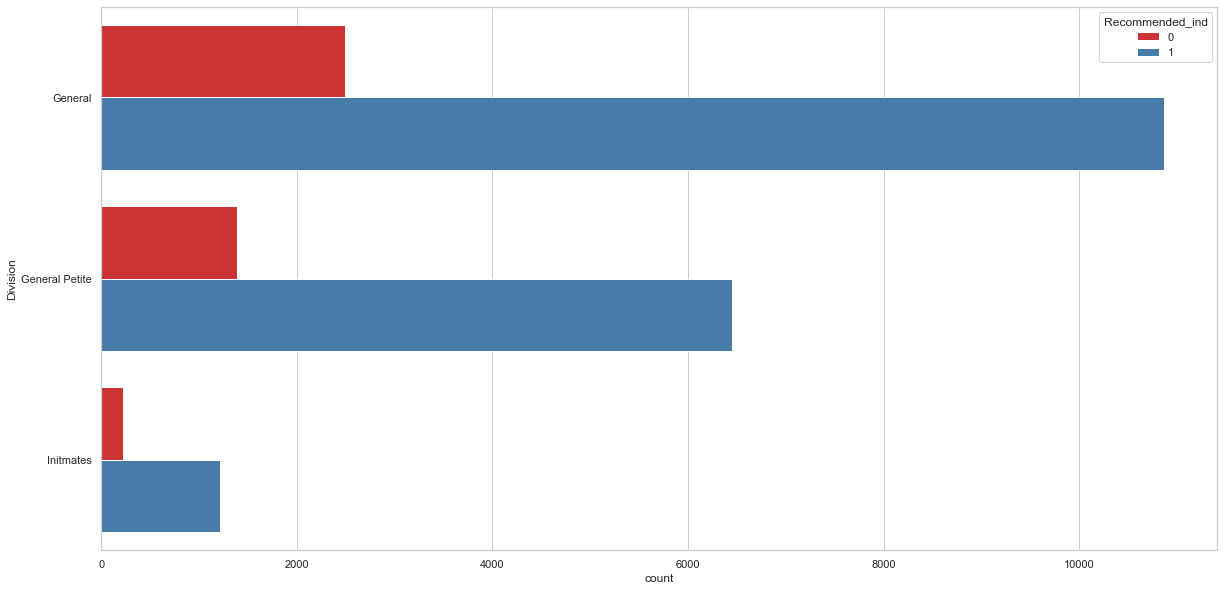

In [95]:
# Create a bar chart to find out which division had the highest positive Recommended index.

fig = plt.figure(figsize=DIMS)
sns.countplot(data=reviews_df, y='Division', hue='Recommended_ind', palette = "Set1",order = reviews_df['Division'].value_counts().index)

General product division had the most positive recomendation followed by Petitie and Inimates. All seem to get over 80% of positive recomenadtion out of thier total customer recomendation recieved.

### Text normalisation on Review Text 

In [25]:
# Import relevant libraries 

import nltk
from nltk.corpus import stopwords
import re

In [26]:
# Define a function to remove regular expression and change to lowercase
def sentence_rge(data):
    data = re.sub('<[^>]*>','',str(data))
    data = re.sub('[\W]+',' ',data.lower())
    return data

# make a copy of reviews dataframe with 4 features
only_reviews_df = reviews_df.copy()
only_reviews_df= only_reviews_df[['Clothing_id','Reviews_text', 'Age_group', 'Recommended_ind']]

# Create a new feature to contaion the filtered reviews
only_reviews_df['Filtered_Reviews'] = only_reviews_df['Reviews_text'].apply(sentence_rge)

# Remove Stopwords
only_reviews_df['Filtered_Reviews'] = only_reviews_df['Filtered_Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
only_reviews_df.head()

,Clothing_id,Reviews_text,Age_group,Recommended_ind,Filtered_Reviews
0,767,Absolutely wonderful - silky and sexy and comf...,"(30, 40]",1,absolutely wonderful silky sexy comfortable
1,1080,Love this dress! it's sooo pretty. i happene...,"(30, 40]",1,love dress sooo pretty happened find store gla...
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,high hopes dress really wanted work initially ...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,love love love jumpsuit fun flirty fabulous ev...
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,shirt flattering due adjustable front tie perf...


In [27]:
# eg. This is the original text of the first review in our dataset

only_reviews_df.loc[10]['Reviews_text']

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

In [28]:
# and this is how the text looks like after stemming

only_reviews_df.loc[10]['Filtered_Reviews']

'dress runs small esp zipper area runs ordered sp typically fits tight material top looks feels cheap even pulling cause rip fabric pretty disappointed going christmas dress year needless say going back'

### Sentiment analysis on Filtered reviews

We apply VADER for our sentiment analysis. We use its compound score as the main scoring for our text.

In [29]:
# Import relevant library

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
# Define VADER
vader = SentimentIntensityAnalyzer()

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

only_reviews_df['vader_comp'] = only_reviews_df.Filtered_Reviews.apply(detect_vader_comp)

In [31]:
only_reviews_df.head(5)

,Clothing_id,Reviews_text,Age_group,Recommended_ind,Filtered_Reviews,vader_comp
0,767,Absolutely wonderful - silky and sexy and comf...,"(30, 40]",1,absolutely wonderful silky sexy comfortable,0.8991
1,1080,Love this dress! it's sooo pretty. i happene...,"(30, 40]",1,love dress sooo pretty happened find store gla...,0.9710
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,high hopes dress really wanted work initially ...,0.9062
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,love love love jumpsuit fun flirty fabulous ev...,0.9464
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,shirt flattering due adjustable front tie perf...,0.9062


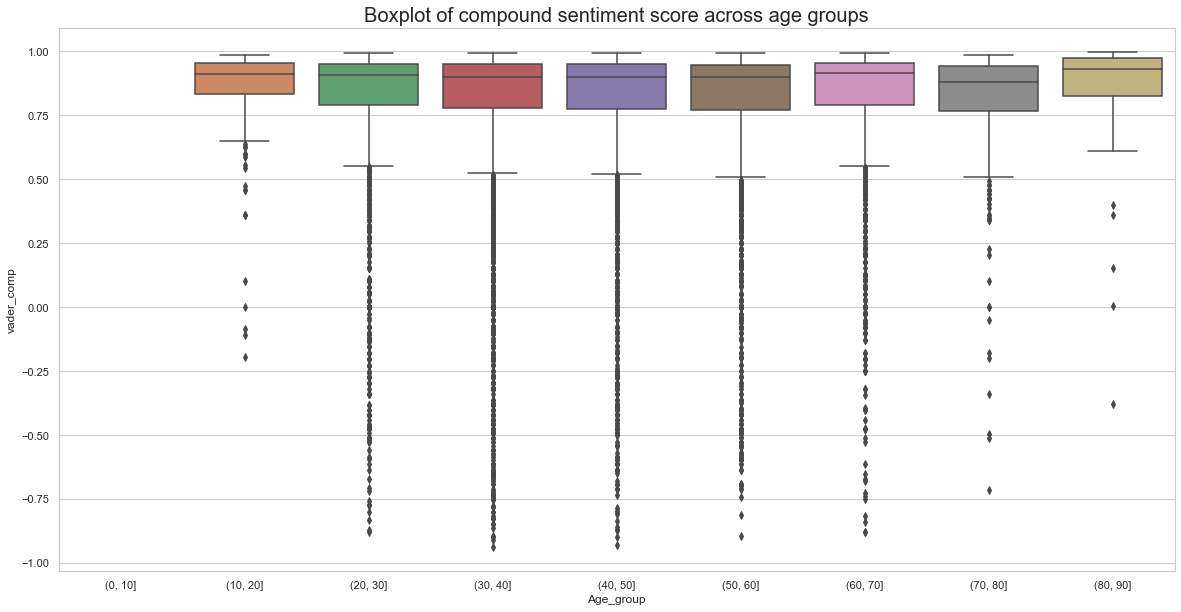

In [32]:
# Create a box plot to analyse the spread of vader compound score by age group

fig = plt.figure(figsize=DIMS)
ax = fig.add_subplot(111)
sns.boxplot(data=only_reviews_df[['vader_comp', 'Age_group']],x= 'Age_group',y='vader_comp', ax=ax)
ax.set_title('Boxplot of compound sentiment score across age groups', fontsize=20)
plt.show()

Conclusion: Women across all age groups have given very positive sentiments about their shopping experience, with a general compound polarity of 0.9. However, there are more outliers in sentiment scores amongst women from 20s to 70s.

### Classify sentiments into positive, negative, neutral
Then we set 0.05 and -0.05 as our thresholds to categorize the texts. We assign text with compound score larger than 0.05 as positive text(1), compound score smaller than -0.05 as negative text(0), others as neutral text(2).

In [33]:
category = []

for i in only_reviews_df['vader_comp']: 
    
    if i >= 0.05:
        category.append(1)

    elif i <= -0.05:
        category.append(0)

    else:
        category.append(2)

only_reviews_df['Sentiment_category'] = category

In [34]:
only_reviews_df.shape

(22628, 7)

In [35]:
# Number of sentiment categorie

num_sentiment_df = only_reviews_df.copy()
num_sentiment_df = num_sentiment_df[['Clothing_id', 'Sentiment_category']]
num_sentiment_agg = num_sentiment_df.groupby('Sentiment_category').size().reset_index(name='No. of sentiments')
num_sentiment_agg

,Sentiment_category,No. of sentiments
0,0,580
1,1,21824
2,2,224


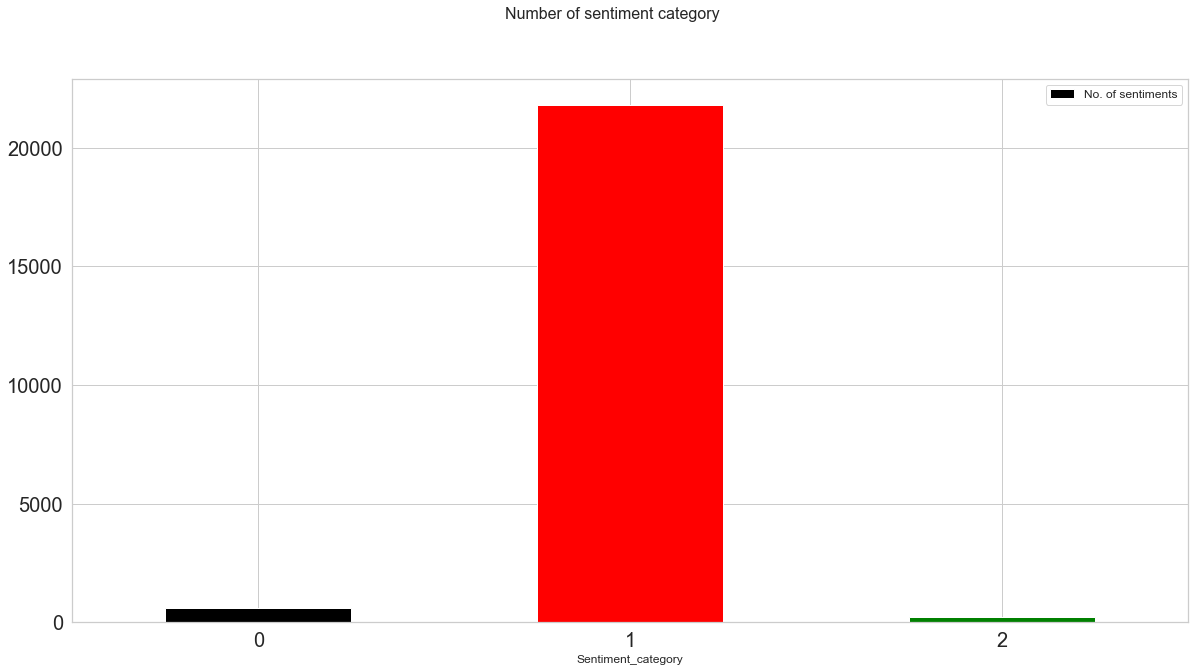

In [36]:
# Create a column chart to visualise the total count by sentiment category

fig, ax = plt.subplots()
colors = ['black', 'red','green']
num_sentiment_agg.plot(kind='bar', x='Sentiment_category', y='No. of sentiments', figsize = DIMS, ax=ax, rot=0, fontsize = 20, color=colors)
fig.suptitle('Number of sentiment category', fontsize=16)
ax.legend(['No. of sentiments'], fontsize=12)

Given that there are a lot more positive reviews, the list of popular items found earlier should reflect positive sentiments about their purchase. The company can consider manufacturing or bringing in more of such type of apparels.
The large proportion of positive reviews also corresponds with the greater proportion of maximum (5/5) ratings given.

In [37]:
# we will drop the neutral text

only_reviews_df.drop(only_reviews_df[only_reviews_df['Sentiment_category']==2].index, inplace=True)
only_reviews_df.head()

,Clothing_id,Reviews_text,Age_group,Recommended_ind,Filtered_Reviews,vader_comp,Sentiment_category
0,767,Absolutely wonderful - silky and sexy and comf...,"(30, 40]",1,absolutely wonderful silky sexy comfortable,0.8991,1
1,1080,Love this dress! it's sooo pretty. i happene...,"(30, 40]",1,love dress sooo pretty happened find store gla...,0.9710,1
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,high hopes dress really wanted work initially ...,0.9062,1
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,love love love jumpsuit fun flirty fabulous ev...,0.9464,1
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,shirt flattering due adjustable front tie perf...,0.9062,1


In [38]:
only_reviews_df.shape

(22404, 7)

In [39]:
# Create a final new dataframe with only the Review_Text and Sentiment_Category

data_final = only_reviews_df[['Filtered_Reviews','Sentiment_category']]

In [40]:
data_final.shape

(22404, 2)

### Wordcloud for each category of sentiments

Create a visual representations of words that give greater prominence to words that appear more frequently for each category of sentiments 

Positive words are as follows


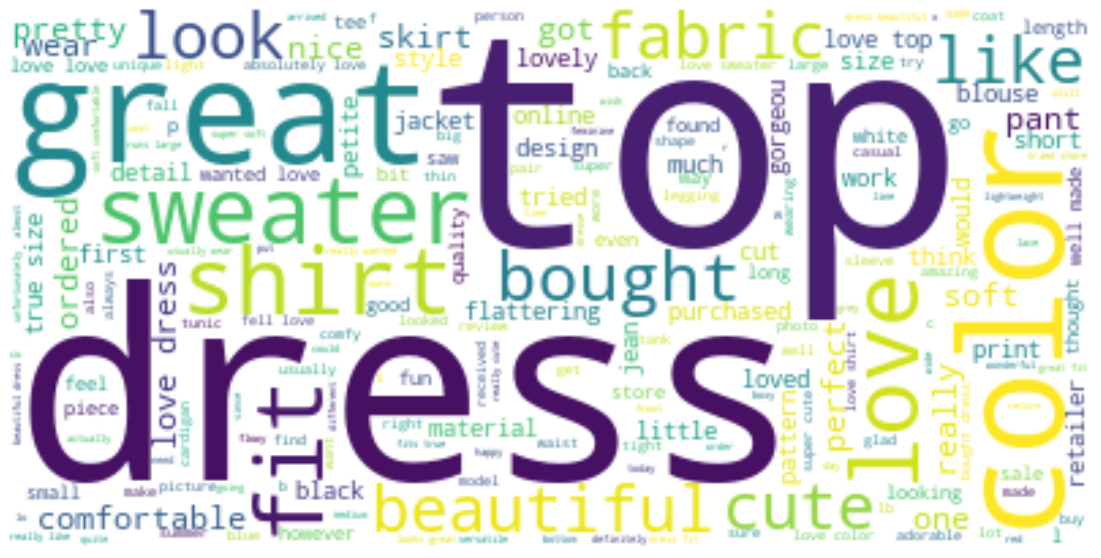

Negative words are as follows


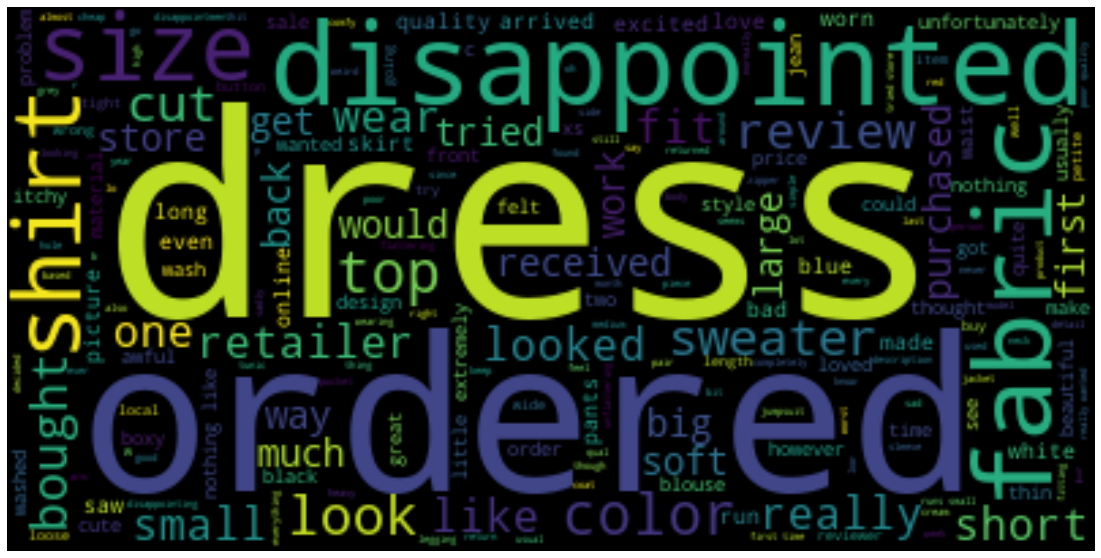

In [52]:
# Import relevant library

from wordcloud import WordCloud

# Get ready the respective category of sentiment's filtered reviews text for Word Cloud
Positive_Data = data_final[data_final["Sentiment_category"] == 1]
Positive_Data = Positive_Data["Filtered_Reviews"]
Negative_Data = data_final[data_final["Sentiment_category"] == 0]
Negative_Data = Negative_Data["Filtered_Reviews"] 

# Convert Data to String
Positive_Data_2 = Positive_Data.to_string()
Negative_Data_2 = Negative_Data.to_string()

print("Positive words are as follows")
Wordcloud_P = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(Positive_Data_2)
plt.figure(figsize=(DIMS))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show() 

print("Negative words are as follows")
Wordcloud_N = WordCloud(stopwords=stopwords.words('english'), background_color='black').generate(Negative_Data_2)
plt.figure(figsize=(DIMS))
plt.imshow(Wordcloud_N, interpolation='bilinear')
plt.axis("off")
plt.show()

Conclusion:
The main elements contributing to both positive and negative reviews are top, dress. However, words like fit and size are more commonly associated with negative reviews, while words such as fabric and colour appear more often with positive reviews. While it seems that generally, the experience from the purchase of tops and dresses from this e-commerce company generate mixed reviews, I feel that the company can continue with its current choice of fabric and colour it chose for its tops and dresses, given that the proportion of positive reviews are significantly larger than negative reviews.

### Predictive Modeling

In [42]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22404 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Filtered_Reviews    22404 non-null  object
 1   Sentiment_category  22404 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 525.1+ KB


In [43]:
data_final['Sentiment_category'].value_counts()

1    21824
0      580
Name: Sentiment_category, dtype: int64

Because there are 21824 positive rows and 580 negative rows, the dataset is imbalanced. To solve this problem, we used SMOTE to oversample the data in the “negative” class. After the process, the amount of both two classes are 21824 rows.

In [44]:
# Import relevant libaries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [45]:
# SMOTE expects X to be numerical data only, so we will convert text data into numericals using TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(data_final['Filtered_Reviews'])

In [46]:
y = data_final['Sentiment_category'].tolist() 

# Split data into training and testing set according to the ratio 70:30.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [47]:
# Counter check the size of negative(0) y train set after Smote

counter = Counter(y_train)
print('Before', counter)

# over sampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 15272, 0: 410})
After Counter({1: 15272, 0: 15272})


The size of negative y_train sample set after resample, had increase from 410 to 15272 ie. same as the numner of positive sample.

### Building Models

We will build 4 models and made predictions : Logistic Regression, Naive Bayes, Decision Tree and Random Forest.

To compare the performance of prediction of the models, we calculated Accuracy, Recall, F1-Score, Confusion Matrix, ROC and AUC for every model.

In [48]:
# Import revelant libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


  __________________________ Logistic Regression __________________________
  
Accuracy: 0.9626599226420708
Recall: 0.9626599226420708
F1-Score: 0.9677717995533163
Confusion Matrix
[[ 112   58]
 [ 193 6359]]
              precision    recall  f1-score   support

           0       0.37      0.66      0.47       170
           1       0.99      0.97      0.98      6552

    accuracy                           0.96      6722
   macro avg       0.68      0.81      0.73      6722
weighted avg       0.98      0.96      0.97      6722


  __________________________ Naive Bayes __________________________
  
Accuracy: 0.9274025587622732
Recall: 0.9274025587622732
F1-Score: 0.9444892969171818
Confusion Matrix
[[  94   76]
 [ 412 6140]]
              precision    recall  f1-score   support

           0       0.19      0.55      0.28       170
           1       0.99      0.94      0.96      6552

    accuracy                           0.93      6722
   macro avg       0.59      0.75      0.62  

<Figure size 432x288 with 0 Axes>

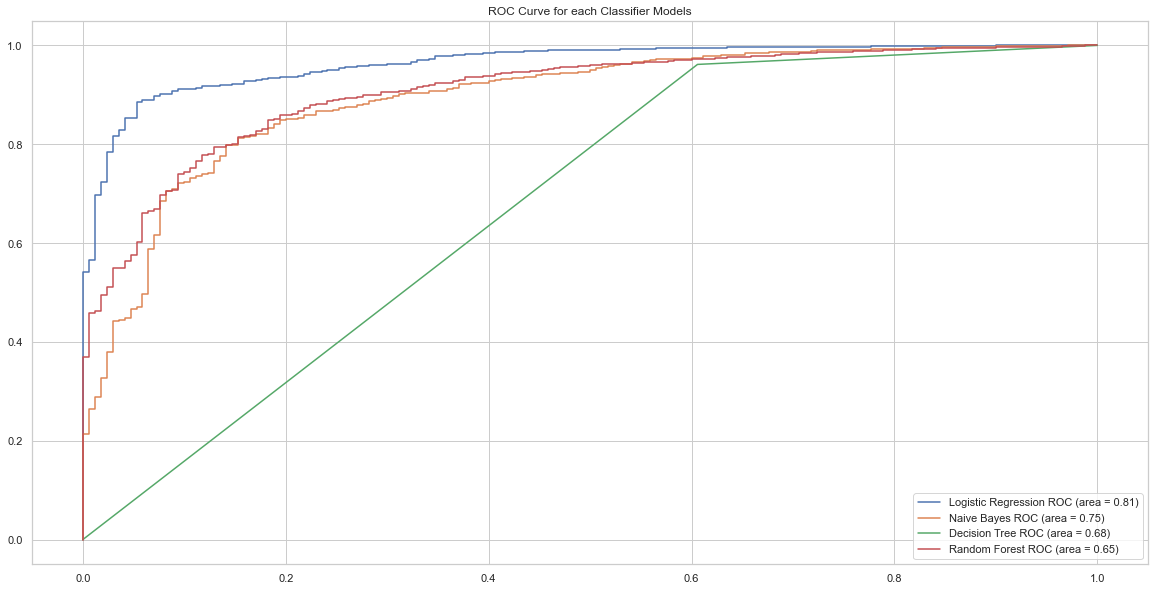

In [57]:
# Create a models list 

models = [{
   'label': 'Logistic Regression',
   'model': LogisticRegression(random_state=0),
},
{
   'label': 'Naive Bayes',
   'model': MultinomialNB(),

},
{
   'label': 'Decision Tree',
   'model': DecisionTreeClassifier(),
},
{
   'label': 'Random Forest',
   'model': RandomForestClassifier(max_depth=13, random_state=0),
}]

# Model fitting for models list and measure thier classification performance level. 

for n in models:
   model = n['model']
   model.fit(X_train_sm,y_train_sm)
   y_pred=model.predict(X_test)   

   print("""
  __________________________ """+n['label']+""" __________________________
  """)
   print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
   print("Recall: "+str(recall_score(y_test, y_pred, average="weighted")))
   print("F1-Score: "+str(f1_score(y_test, y_pred, average="weighted")))
   print("Confusion Matrix")
   print(confusion_matrix(y_test, y_pred))
   print(classification_report(y_test, y_pred))


# Plot the ROC curve to visually evaluate classifier output quality for each model. 
plt.figure(0).clf()
fig = plt.figure(figsize=DIMS)
for n in models:
   model = n['model']
   model.fit(X_train_sm,y_train_sm)
   Y_pred=model.predict(X_test)  

   fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])  

   auc = roc_auc_score(y_test, model.predict(X_test))

   plt.plot(fpr, tpr, label='%s ROC (area = %.2f)' % (n['label'], auc))

# displaying the title
plt.title("ROC Curve for each Classifier Models")

# displaying the legend
plt.legend()

Logistic Regression is the best model. Its F1 Score 0.9675 and AUC 0.82 are both the highest among the four models.